## **ИУ5-62Б Бекетов Р.А.**
### Вариант 3 => Номер задачи №1, набор данных №3
### РК1

#### Задача №1.
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

**Дополнительные требования по группам:**

Для произвольной колонки данных построить гистограмму.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("toy_dataset.csv")

In [7]:
data.sample(5)

,Number,City,Gender,Age,Income,Illness
29628,29629,New York City,Male,46,105817.0,No
16925,16926,Dallas,Male,55,53425.0,No
46779,46780,New York City,Female,38,95199.0,No
81309,81310,Los Angeles,Male,53,90567.0,No
17114,17115,Dallas,Male,37,52123.0,No


In [54]:
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


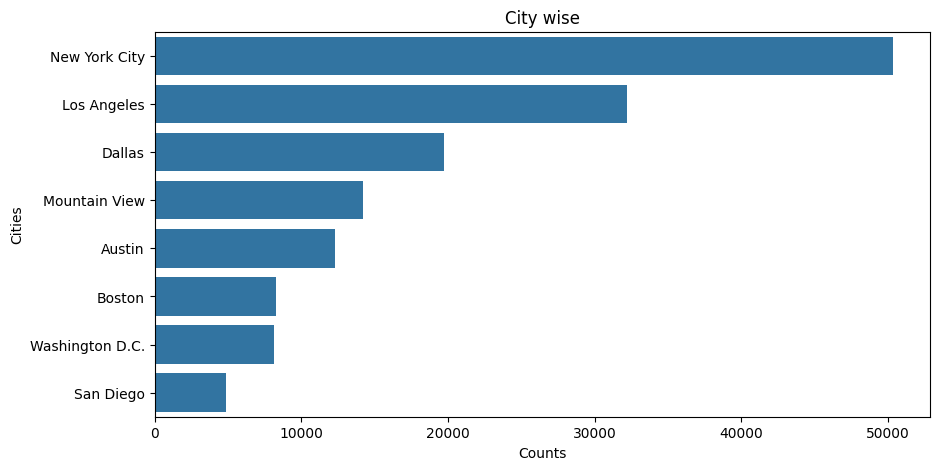

In [60]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5
sns.barplot(x = data['City'].value_counts().values, y = data['City'].value_counts().index)
plt.title('City wise')
plt.xlabel('Counts')
plt.ylabel('Cities')
plt.show()



In [18]:
for col in data.columns:
    print("===============================")
    print(f"conumn_name = {col}")
    print(data[col].value_counts())

conumn_name = Number
Number
1         1
100013    1
99997     1
99998     1
99999     1
         ..
50001     1
50002     1
50003     1
50004     1
150000    1
Name: count, Length: 150000, dtype: int64
conumn_name = City
City
New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: count, dtype: int64
conumn_name = Gender
Gender
Male      83800
Female    66200
Name: count, dtype: int64
conumn_name = Age
Age
26    3918
64    3879
43    3862
41    3862
54    3838
29    3805
28    3798
27    3790
63    3784
44    3782
36    3780
59    3775
47    3773
37    3771
33    3769
58    3762
49    3762
42    3760
32    3759
52    3753
31    3749
48    3743
40    3740
61    3737
38    3734
57    3732
30    3731
51    3729
53    3724
34    3710
46    3707
50    3692
55    3687
62    3684
39    3675
45    3670
35    3658
56    3602
60    3582
25    1868


Пропусков нет

In [8]:
df_cleaned = data.dropna()

In [10]:
df_cleaned.shape, data.shape

((150000, 6), (150000, 6))

ч.т.д.

In [19]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [20]:
data_coding = data.copy()

In [21]:
data_coding['Gender'] = data_coding['Gender'].replace({'Male': 1, 'Female': 0})
data_coding['Illness'] = data_coding['Illness'].replace({'Yes': 1, 'No': 0})

/var/folders/bg/1zs8qp8d26v62zscyhsgmff40000gq/T/ipykernel_70965/2439403119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_coding['Gender'] = data_coding['Gender'].replace({'Male': 1, 'Female': 0})
/var/folders/bg/1zs8qp8d26v62zscyhsgmff40000gq/T/ipykernel_70965/2439403119.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_coding['Illness'] = data_coding['Illness'].replace({'Yes': 1, 'No': 0})


In [23]:
data_coding.dtypes

Number       int64
City        object
Gender       int64
Age          int64
Income     float64
Illness      int64
dtype: object

### Предположительно, мы хотим предсказывать колонку Illness, тогда:

In [34]:
import category_encoders as ce

In [43]:
woe_encoder = ce.WOEEncoder(cols=['City'])

data_coding_woe = woe_encoder.fit_transform(data_coding.drop(columns=['Illness']), data_coding['Illness'])
data_coding_woe['Illness'] = data_coding['Illness']
data_coding_woe.dtypes

Number       int64
City       float64
Gender       int64
Age          int64
Income     float64
Illness      int64
dtype: object

In [47]:
data_coding_woe.sample(5)

,Number,City,Gender,Age,Income,Illness
129753,129754,0.019084,0,43,84805.0,0
34738,34739,-0.013410,1,35,92564.0,0
65314,65315,-0.013410,0,34,94930.0,0
79823,79824,-0.014788,0,37,94477.0,0
109801,109802,0.026164,1,63,142994.0,0


#### drop Number так как это суррогатный ключ

In [50]:
data_coding_woe.drop(columns=['Number'], inplace=True)

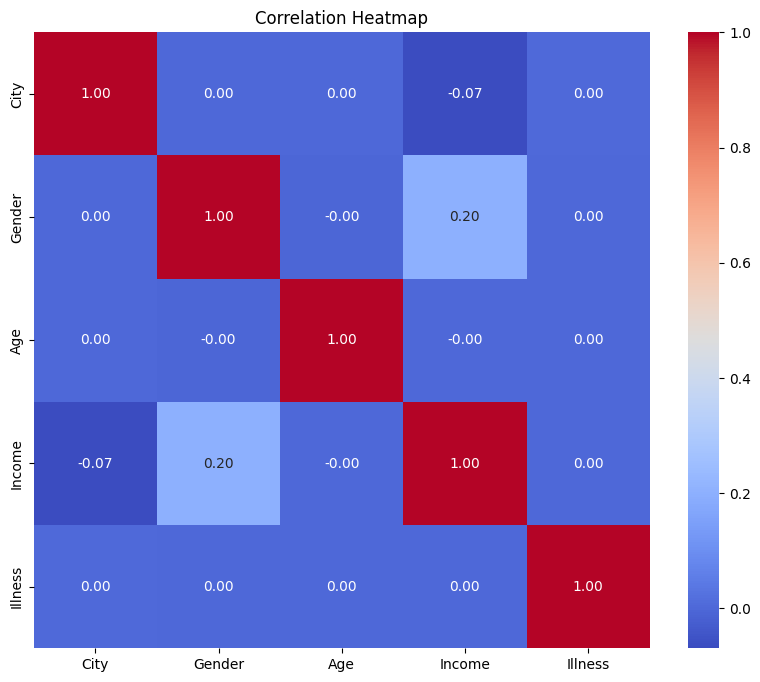

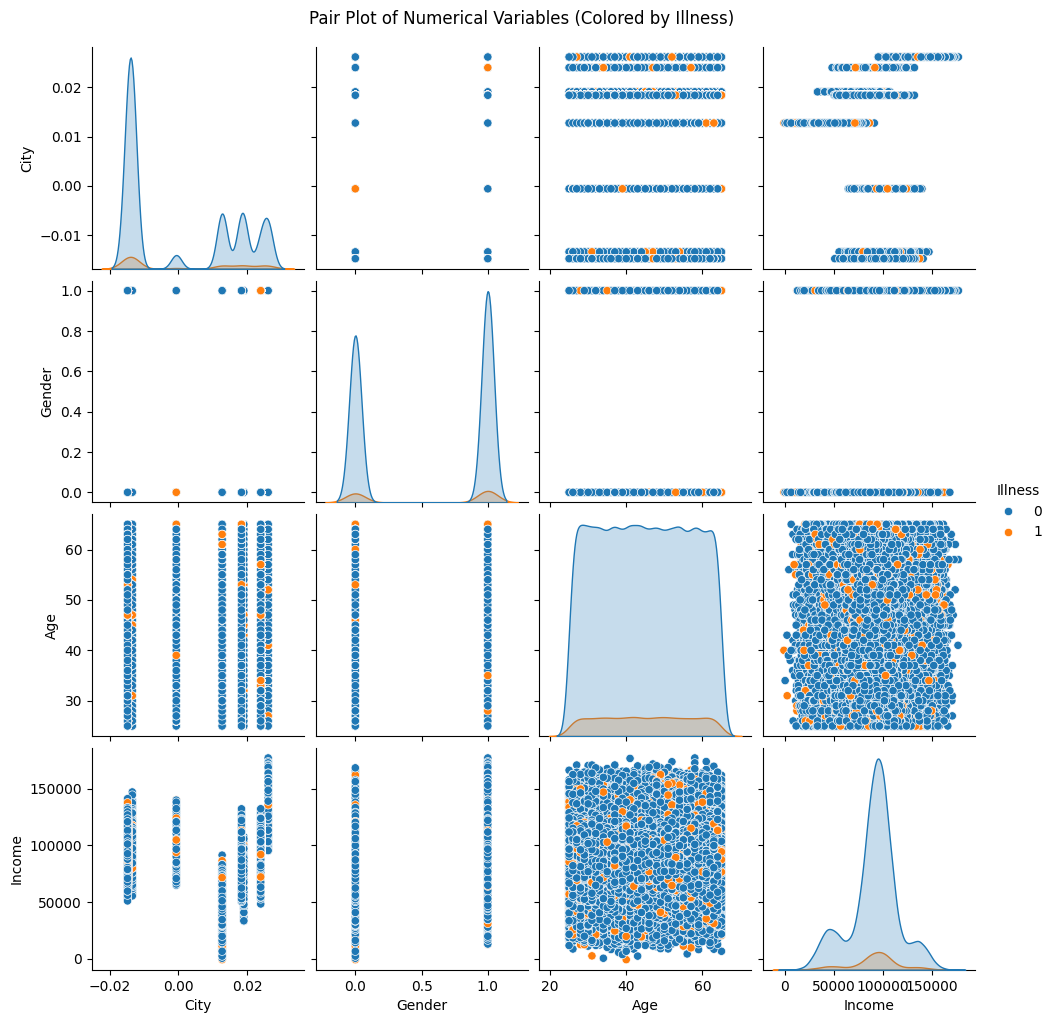

In [52]:
corr_matrix = data_coding_woe.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

pair_plot = sns.pairplot(data_coding_woe, hue='Illness')
plt.suptitle('Pair Plot of Numerical Variables (Colored by Illness)', y=1.02)
plt.show()

<Axes: >

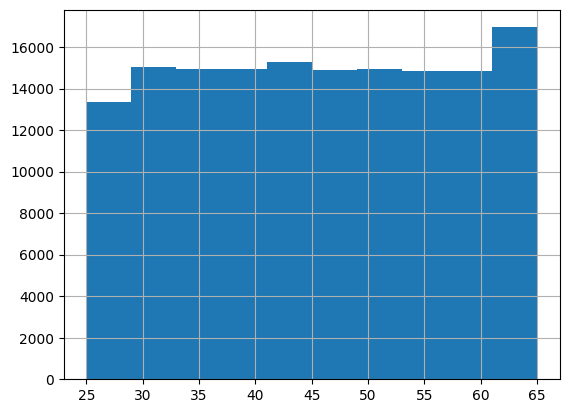

In [53]:
data_coding_woe['Age'].hist()

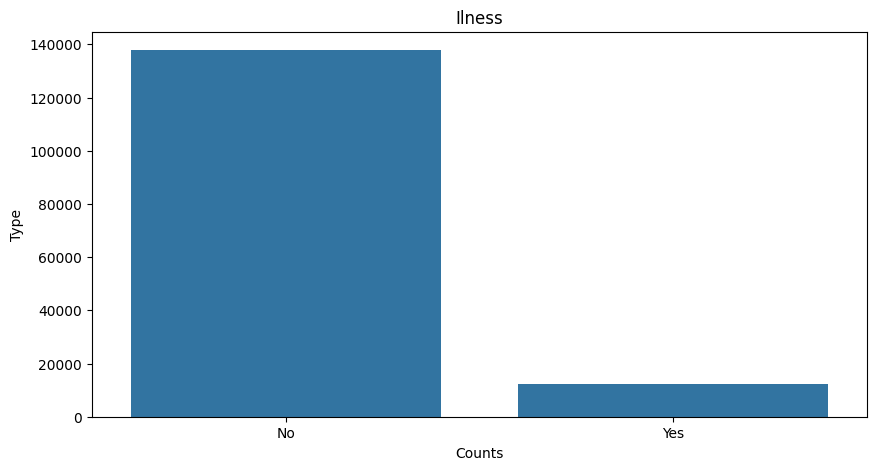

In [62]:
rcParams['figure.figsize'] = 10,5
sns.barplot(x = data['Illness'].value_counts().index, y = data['Illness'].value_counts().values)
plt.title('Ilness')
plt.xlabel('Counts')
plt.ylabel('Type')
plt.show()



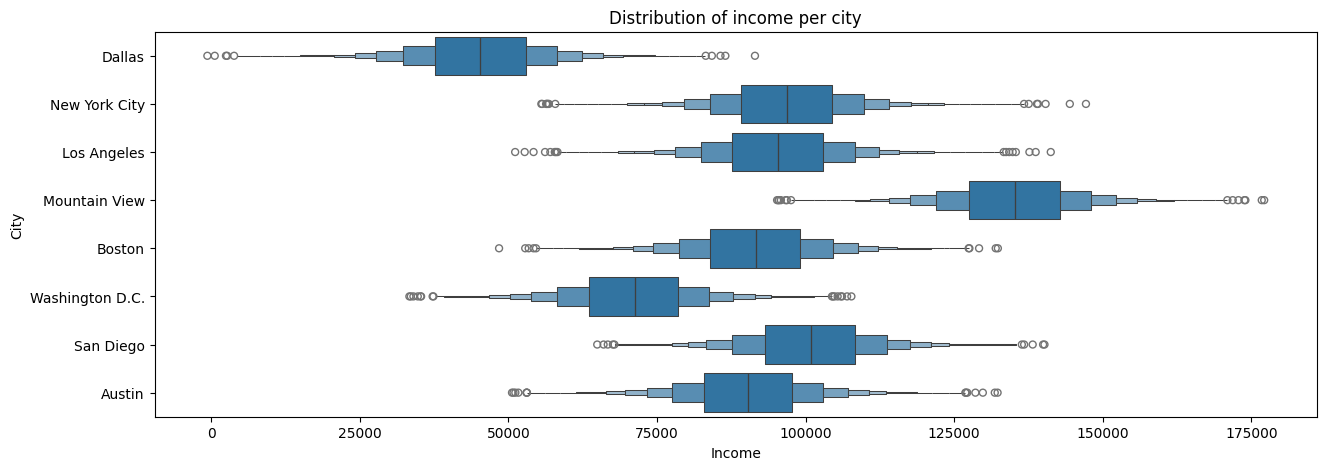

In [64]:
rcParams['figure.figsize'] = 15,5
sns.boxenplot(x = data['Income'], y = data['City'])
plt.title('Distribution of income per city')
plt.show()

### Вывод:
##### Корреляция между фичами почти что отсутствует, для бейзлайна можно выбрать линейные модели и потюнить параметры, также можно попробовать ансамблевые модели (так как корреляция между фичами очень мала, то Variance составляющая не будет сильно мешать ансамблям)

##### Для получения хороших результатов скорее всего придётся заниматься фичи инженерингом и составлять свою фичу на основании имеющихся

##### Основываясь на здравом смысле, если предсказывать наличие болезни, то скорее всего вклад будут привносить все фичи - так как город, возраст, пол и доход "нативно" коррелирует с таргетом, возможно пол будет самой слабой фичёй